In [1]:
import six.moves.cPickle as pickle
import gzip
import os
import numpy as np
#import scipy.misc
from PIL import Image

def load_data(dataset):
    ''' Loads the dataset

    :type dataset: string
    :param dataset: the path to the dataset (here MNIST)
    
    copied from http://deeplearning.net/ and revised by hchoi
    '''

    # Download the MNIST dataset if it is not present
    data_dir, data_file = os.path.split(dataset)
    if data_dir == "" and not os.path.isfile(dataset):
        # Check if dataset is in the data directory.
        new_path = os.path.join(
            os.path.split(__file__)[0],
            dataset
        )
        if os.path.isfile(new_path) or data_file == 'mnist.pkl.gz':
            dataset = new_path

    if (not os.path.isfile(dataset)) and data_file == 'mnist.pkl.gz':
        from six.moves import urllib
        origin = (
            'http://www.iro.umontreal.ca/~lisa/deep/data/mnist/mnist.pkl.gz'
        )
        print('Downloading data from %s' % origin)
        urllib.request.urlretrieve(origin, dataset)

    print('... loading data')

    # Load the dataset
    with gzip.open(dataset, 'rb') as f:
        try:
            train_set, valid_set, test_set = pickle.load(f, encoding='latin1')
        except:
            train_set, valid_set, test_set = pickle.load(f)
    # train_set, valid_set, test_set format: tuple(input, target)
    # input is a numpy.ndarray of 2 dimensions (a matrix)
    # where each row corresponds to an example. target is a
    # numpy.ndarray of 1 dimension (vector) that has the same length as
    # the number of rows in the input. It should give the target
    # to the example with the same index in the input.

    return train_set, valid_set, test_set


if __name__ == '__main__':
    train_set, val_set, test_set = load_data('mnist.pkl.gz')

    train_x, train_y = train_set
    val_x, val_y = val_set
    test_x, test_y = test_set
    
    print(train_x.shape)
    print(train_y.shape)
    
#     for i in range(100):
#         tmp_img = train_x[i].reshape((28,28))*255.9
#         samp_img = Image.fromarray(tmp_img.astype(np.uint8))
#         samp_img.save('test'+str(i)+'.jpg')
#         print(train_y[i])

    mean_img = train_x.mean(1)
    print(train_x)
    print(np.sum(train_x <= 0.1))
    print(np.sum(train_x >= 0.9))
    print(mean_img.shape)

    cov = np.cov(train_x.T)
    print(cov)
    print(cov.shape)
    # for eigendecomposition 
    # check http://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.eig.html 
    
    
    

... loading data
(50000, 784)
(50000,)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
32362898
3423594
(50000,)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(784, 784)


In [2]:
train_x.shape

(50000, 784)

In [3]:
print(np.mean(train_x), np.std(train_x))

0.13044983 0.3072898


In [4]:
#Q1: calculate mean, variance, eigenvectors and eigenvalues
mean = np.mean(train_x,0)
variance = np.std(train_x, 0)**2
eig = np.linalg.eig
e_values, e_vectors = eig(cov)
print("Shape of mean",mean.shape)
print("Shape of variance",variance.shape)
print("Shape of e_values",e_values.shape)
print("Shape of e_vectors",e_vectors.shape)

Shape of mean (784,)
Shape of variance (784,)
Shape of e_values (784,)
Shape of e_vectors (784, 784)


In [5]:
mean

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       9.84375038e-06, 3.67187495e-05, 1.68749993e-05, 7.03125011e-07,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.24999997e-06, 4.29687498e-06, 4.35156253e-05, 1.08125001e-04,
       1.55390619e-04, 2.10156257e-04, 3.79609381e-04, 5.69765631e-04,
       6.41796854e-04, 6.68984372e-04, 7.12656241e-04, 6.77187520e-04,
       6.93593756e-04, 5.20859379e-04, 3.30390612e-04, 2.48671888e-04,
       2.13593754e-04, 7.93750005e-05, 3.81249993e-05, 1.65625006e-05,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [6]:
variance

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       4.13679481e-06, 3.39246399e-05, 1.42377821e-05, 2.47183696e-08,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       7.81232643e-08, 6.93633126e-07, 2.03785403e-05, 7.95869855e-05,
       1.16940457e-04, 1.46276449e-04, 2.79385422e-04, 4.26736311e-04,
       4.63585515e-04, 4.70893894e-04, 5.24938572e-04, 5.03919553e-04,
       5.26880031e-04, 3.80499288e-04, 2.46688520e-04, 1.82907606e-04,
       1.64867102e-04, 4.92465770e-05, 2.26845023e-05, 1.19117340e-05,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [7]:
e_values

array([ 5.10829281e+00+0.0000000e+00j,  3.70097988e+00+0.0000000e+00j,
        3.25867822e+00+0.0000000e+00j,  2.82008442e+00+0.0000000e+00j,
        2.54673474e+00+0.0000000e+00j,  2.26446711e+00+0.0000000e+00j,
        1.71820047e+00+0.0000000e+00j,  1.51312696e+00+0.0000000e+00j,
        1.45150445e+00+0.0000000e+00j,  1.24028893e+00+0.0000000e+00j,
        1.10062981e+00+0.0000000e+00j,  1.05915625e+00+0.0000000e+00j,
        8.99468133e-01+0.0000000e+00j,  8.81646170e-01+0.0000000e+00j,
        8.27898107e-01+0.0000000e+00j,  7.82545040e-01+0.0000000e+00j,
        6.91022039e-01+0.0000000e+00j,  6.69206752e-01+0.0000000e+00j,
        6.22005467e-01+0.0000000e+00j,  6.03398741e-01+0.0000000e+00j,
        5.60457081e-01+0.0000000e+00j,  5.28160905e-01+0.0000000e+00j,
        4.99920707e-01+0.0000000e+00j,  4.75927774e-01+0.0000000e+00j,
        4.62783396e-01+0.0000000e+00j,  4.38754239e-01+0.0000000e+00j,
        4.28578858e-01+0.0000000e+00j,  4.11413112e-01+0.0000000e+00j,
      

In [8]:
e_vectors

array([[0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
       ...,
       [0.+0.j, 0.+0.j, 0.+0.j, ..., 1.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 1.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 1.+0.j]])

Text(0.5, 1.0, 'Mean Image')

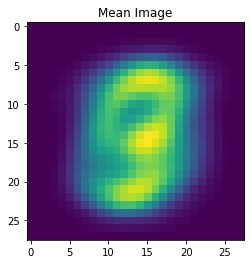

In [9]:
#Q2: Print the mean and the first 10 eigenvector images
import matplotlib.pyplot as plt
plt.imshow(mean.reshape(28,28))
plt.title("Mean Image")

<ipython-input-10-7c70f0624e5c>:5: ComplexWarning: Casting complex values to real discards the imaginary part
  img = img.astype('f')


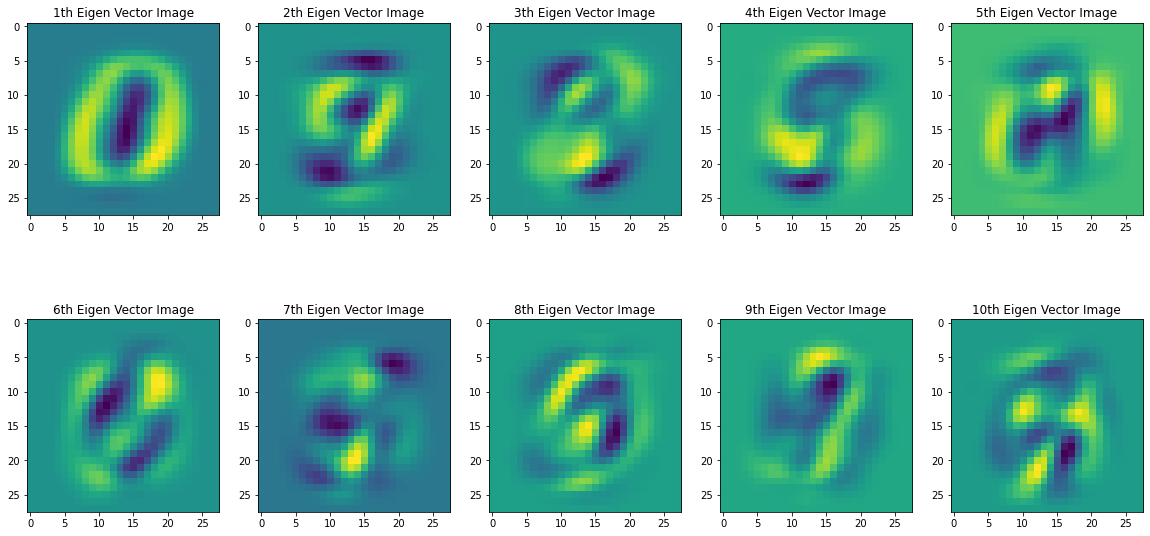

In [10]:
plt.figure(figsize= (20,10))

for i in range(10):
    img = e_vectors[:,i]
    img = img.astype('f')
    plt.subplot(2,5,i+1)
    plt.title("{}th Eigen Vector Image".format(i+1))
    plt.imshow(img.reshape(28,28))
    
plt.show()
    

/Users/igyuseog/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


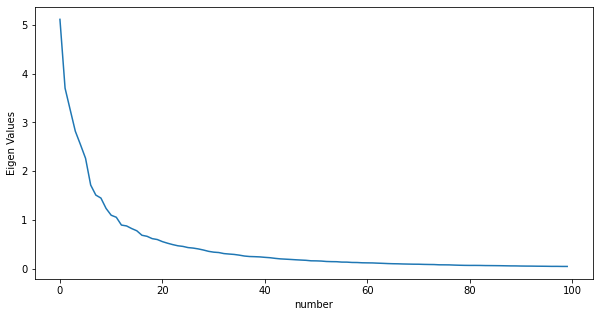

In [11]:
# Q3: Plot the first 100 eigenvalues.
plt.figure(figsize = (10,5))
plt.plot(range(100), e_values[:100])
plt.xlabel("number")
plt.ylabel("Eigen Values")
plt.show()